In [1]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [2]:
# 載入 SavedModel (TensorflowLit格式)

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="Model_H.tflite") #載入對應欲推論結果之Model
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.07430503 0.19063915 0.06015902 0.1783429  0.12642749 0.10934459
  0.1884462  0.07233559]]


In [3]:
# 狗種類別的標籤，須注意順序，以免於顯示結果miss match
labels = ['Maltese_dog','golden_retriever','Labrador_retriever','collie','Border_collie','malamute','Siberian_husky','Samoyed'] 

In [4]:
# 預處理影像
def preprocess_image(image):
    image = cv2.resize(image, (input_details[0]['shape'][2], input_details[0]['shape'][1]))
    image = np.expand_dims(image, axis=0)
    return image

In [5]:
# 從本機資料夾辨識影像
def predict_from_folder(folder_path):
    images = []
    original_imgs = [] #先建立一個保存原來影像輸入來源的list，以便最後於結果顯示原圖
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        original_imgs.append(image)
        image = image.astype("float32") #TensorflowLite影像讀取格式為float32
        image = preprocess_image(image)
        images.append(image)
    
    # 預測
    predictions = []
    for image in images:
        interpreter.set_tensor(input_details[0]['index'], image)
        interpreter.invoke()
        output = interpreter.get_tensor(output_details[0]['index'])
        predictions.append(output)
    
    for i, prediction in enumerate(predictions):
        label_index = np.argmax(prediction)
        label = labels[label_index]
        confidence = prediction[0][label_index]
        print(f'Image {file_name}: {label} (Confidence: {confidence})')
        # image = images[i][0].astype("uint8")
        plt.imshow(cv2.cvtColor(original_imgs[i], cv2.COLOR_BGR2RGB)) #輸出結果搭配原始輸入影像顯示
        plt.title(f'Image {i+1}: {label} (Confidence: {confidence})')
        plt.axis('off')
        plt.show()

Image n02111889_771.jpg: Samoyed (Confidence: 0.9999916553497314)


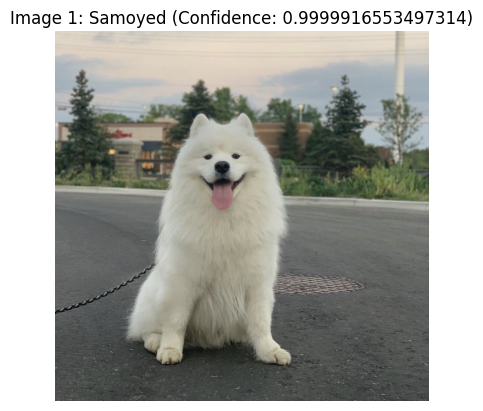

Image n02111889_771.jpg: Labrador_retriever (Confidence: 0.9973803162574768)


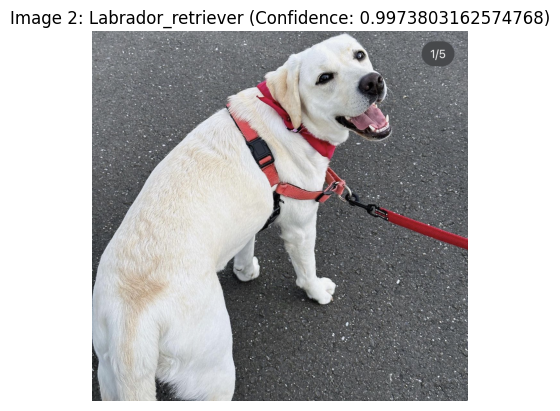

Image n02111889_771.jpg: malamute (Confidence: 0.9999148845672607)


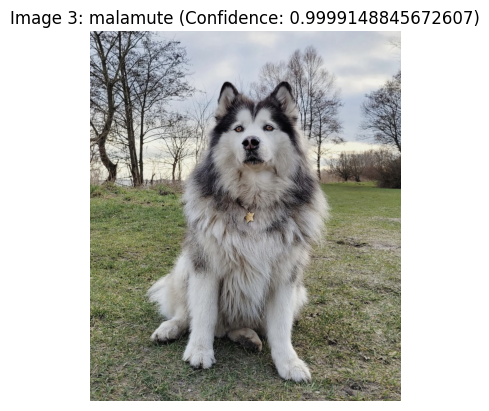

Image n02111889_771.jpg: Siberian_husky (Confidence: 0.9998224377632141)


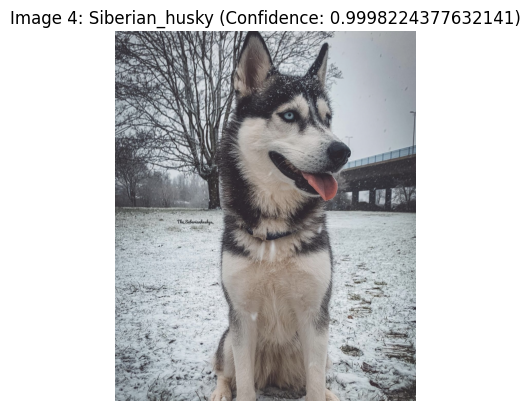

Image n02111889_771.jpg: Border_collie (Confidence: 0.5520384907722473)


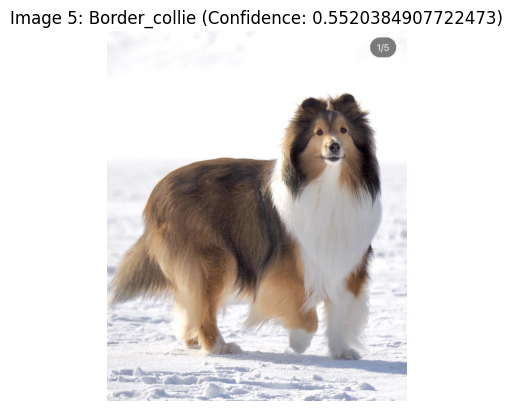

Image n02111889_771.jpg: Border_collie (Confidence: 0.9989944100379944)


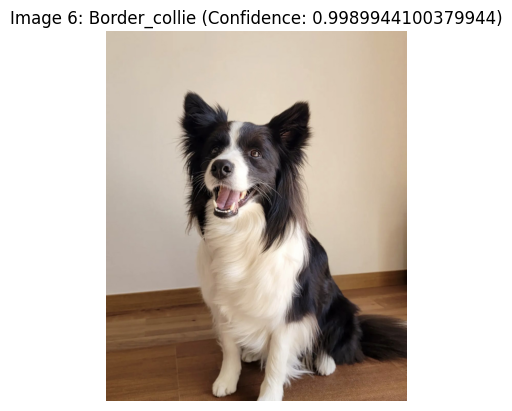

Image n02111889_771.jpg: Maltese_dog (Confidence: 0.9999908208847046)


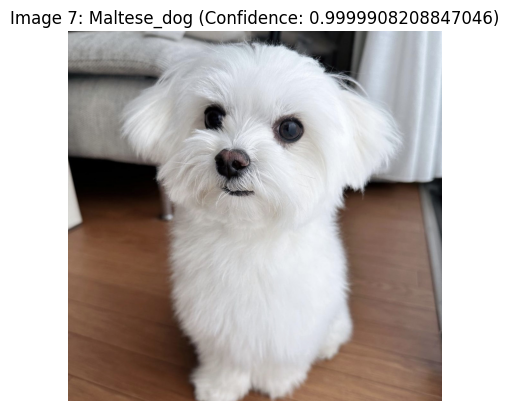

Image n02111889_771.jpg: golden_retriever (Confidence: 0.9655753970146179)


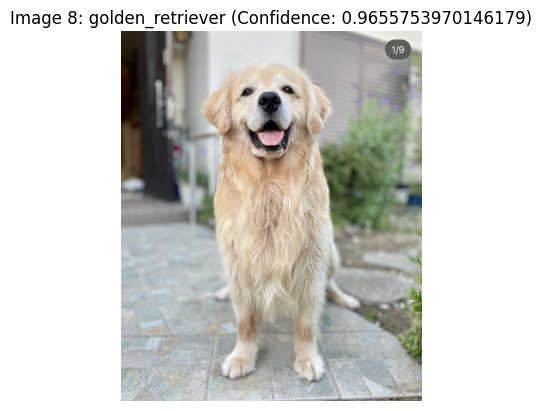

Image n02111889_771.jpg: Maltese_dog (Confidence: 0.9635754823684692)


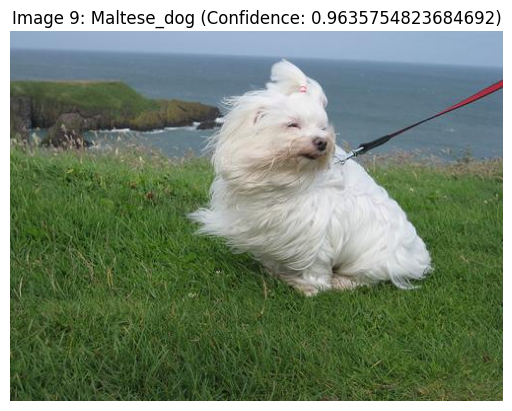

Image n02111889_771.jpg: golden_retriever (Confidence: 0.990483283996582)


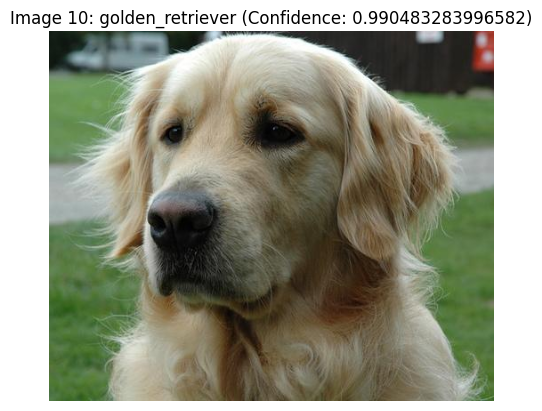

Image n02111889_771.jpg: Labrador_retriever (Confidence: 0.9998332262039185)


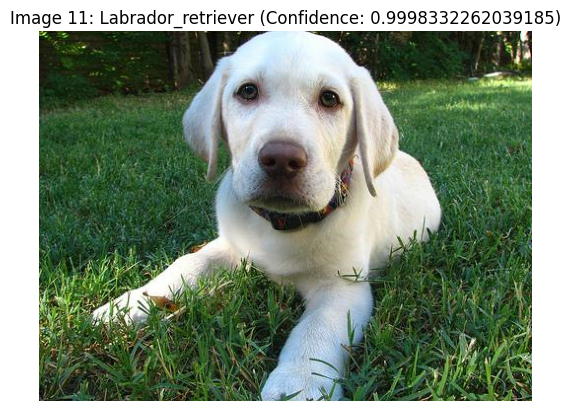

Image n02111889_771.jpg: collie (Confidence: 0.9996930360794067)


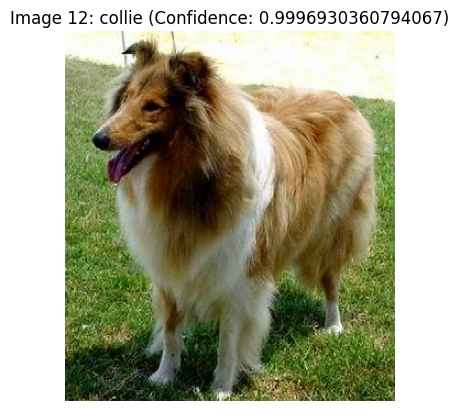

Image n02111889_771.jpg: Border_collie (Confidence: 0.9633178114891052)


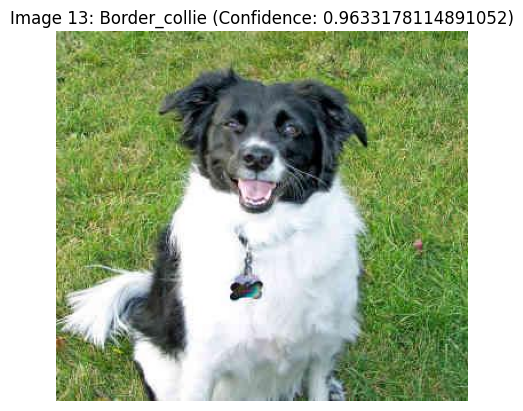

Image n02111889_771.jpg: malamute (Confidence: 0.9872632622718811)


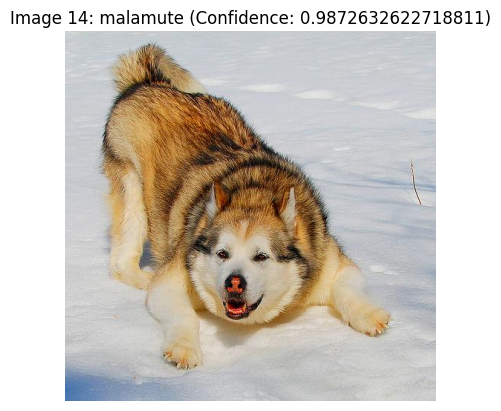

Image n02111889_771.jpg: Siberian_husky (Confidence: 0.8475024700164795)


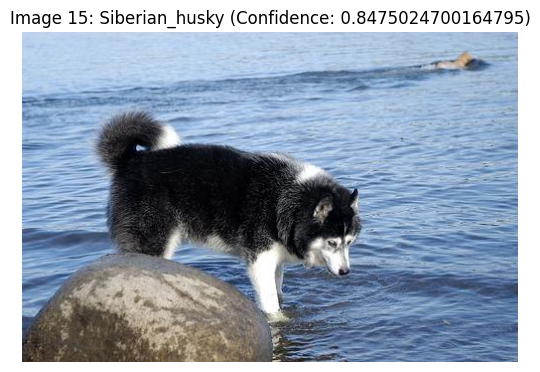

Image n02111889_771.jpg: Samoyed (Confidence: 0.9258185625076294)


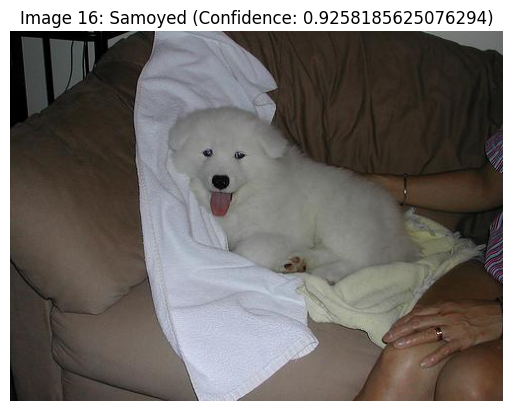

In [6]:
# 資料夾路徑設定
folder_path = 'Input'  # 資料夾路徑
predict_from_folder(folder_path)